<a href="https://colab.research.google.com/github/thatpeacegirl/California-House-Prices-Prediction/blob/main/California_Housing_Prices_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview

**Project: Predicting House Prices in California using a Linear Regression Model and a Polynomial Linear Regression Model (not current house prices)**

The aim of this project is to solidify my understanding of how to use the Linear Regression Model as well as the Polynomial Linear Regression Model.

The data contains information from the 1990 California census of a particular district. The data is a modified version of the California Housing Data used in the paper *Pace, R. Kelley, and Ronald Barry. "Sparse spatial autoregressions." Statistics & Probability Letters 33.3 (1997): 291-297*.

The columns in the data are as follows:

*  **Median House Value:** Median house value for households within a block (measured in US Dollars).
*   **Median Income:** Median income for households within a block of houses (measured in tens of thousands of US Dollars).
*   **Median Age:** Median age of a house within a block; a lower number is a newer building (years).
*   **Total Rooms:** Total number of rooms within a block.
*   **Total Bedrooms:** Total number of bedrooms within a block.
*   **Population:** Total number of people residing within a block.
*   **Households:** Total number of households, a group of people residing within a home unit, for a block.
*   **Latitude:** A measure of how far north a house is; a higher value is farther north (°).
*   **Longitude**: A measure of how far west a house is; a higher value is farther west (°)
*   **Distance to coast:** Distance to the nearest coast point (m).
*   **Distance to Los Angeles:** Distance to the centre of Los Angeles (m).
*   **Distance to San Diego:** Distance to the centre of San Diego (m).
*   **Distance to San Jose:** Distance to the centre of San Jose (m).
*   **Distance to San Francisco:** Distance to the centre of San Francisco (m).








The link to the dataset used can be found [here](https://www.kaggle.com/datasets/fedesoriano/california-housing-prices-data-extra-features/data)

# Importing Libraries and Loading Data

In [1]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/California_Houses.csv')

At this point, examine the dataset. Look at the data contained and examine other information about the dataset.

In [3]:
df.head(5)

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


In [4]:
df.shape

(20640, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

At first glance, the information shows no missing values. To avoid any human error, this will be additionally investigated in the pre-processing stage.

In [32]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
median_house_value,20640.0,206855.816909,115395.615874,14999.000000,119600.000000,179700.000000,264725.000000,5.000010e+05
median_income,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,1.500010e+01
median_age,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,5.200000e+01
total_rooms,20640.0,2635.763081,2181.615252,2.000000,1447.750000,2127.000000,3148.000000,3.932000e+04
total_bedrooms,20640.0,537.898014,421.247906,1.000000,295.000000,435.000000,647.000000,6.445000e+03
population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,3.568200e+04
households,20640.0,499.539680,382.329753,1.000000,280.000000,409.000000,605.000000,6.082000e+03
latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,4.195000e+01
longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-1.143100e+02
distance_to_coast,20640.0,40509.264883,49140.039160,120.676447,9079.756762,20522.019101,49830.414479,3.338047e+05


# Pre-processing

First check for missing and duplicated data in the dataframe.

In [7]:
df.isnull().sum()

Median_House_Value          0
Median_Income               0
Median_Age                  0
Tot_Rooms                   0
Tot_Bedrooms                0
Population                  0
Households                  0
Latitude                    0
Longitude                   0
Distance_to_coast           0
Distance_to_LA              0
Distance_to_SanDiego        0
Distance_to_SanJose         0
Distance_to_SanFrancisco    0
dtype: int64

In [8]:
df.duplicated().sum()

0

**Result:** There are no null or duplicated values in the dataset.

For personal preference, I want to rename all the columns to be in lower case.

In [9]:
df.columns = df.columns.str.lower()
df.columns

Index(['median_house_value', 'median_income', 'median_age', 'tot_rooms',
       'tot_bedrooms', 'population', 'households', 'latitude', 'longitude',
       'distance_to_coast', 'distance_to_la', 'distance_to_sandiego',
       'distance_to_sanjose', 'distance_to_sanfrancisco'],
      dtype='object')

I also want to rename the 'tot_rooms' and 'tot_bedrooms' column names to be more descriptive.

In [10]:
df.rename(columns={'tot_rooms': 'total_rooms', 'tot_bedrooms': 'total_bedrooms'}, inplace=True)
df.columns

Index(['median_house_value', 'median_income', 'median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'latitude', 'longitude',
       'distance_to_coast', 'distance_to_la', 'distance_to_sandiego',
       'distance_to_sanjose', 'distance_to_sanfrancisco'],
      dtype='object')

# Data Visualization

**Univariate Analysis:** Look at the distribution of the values in each of the numerical columns.

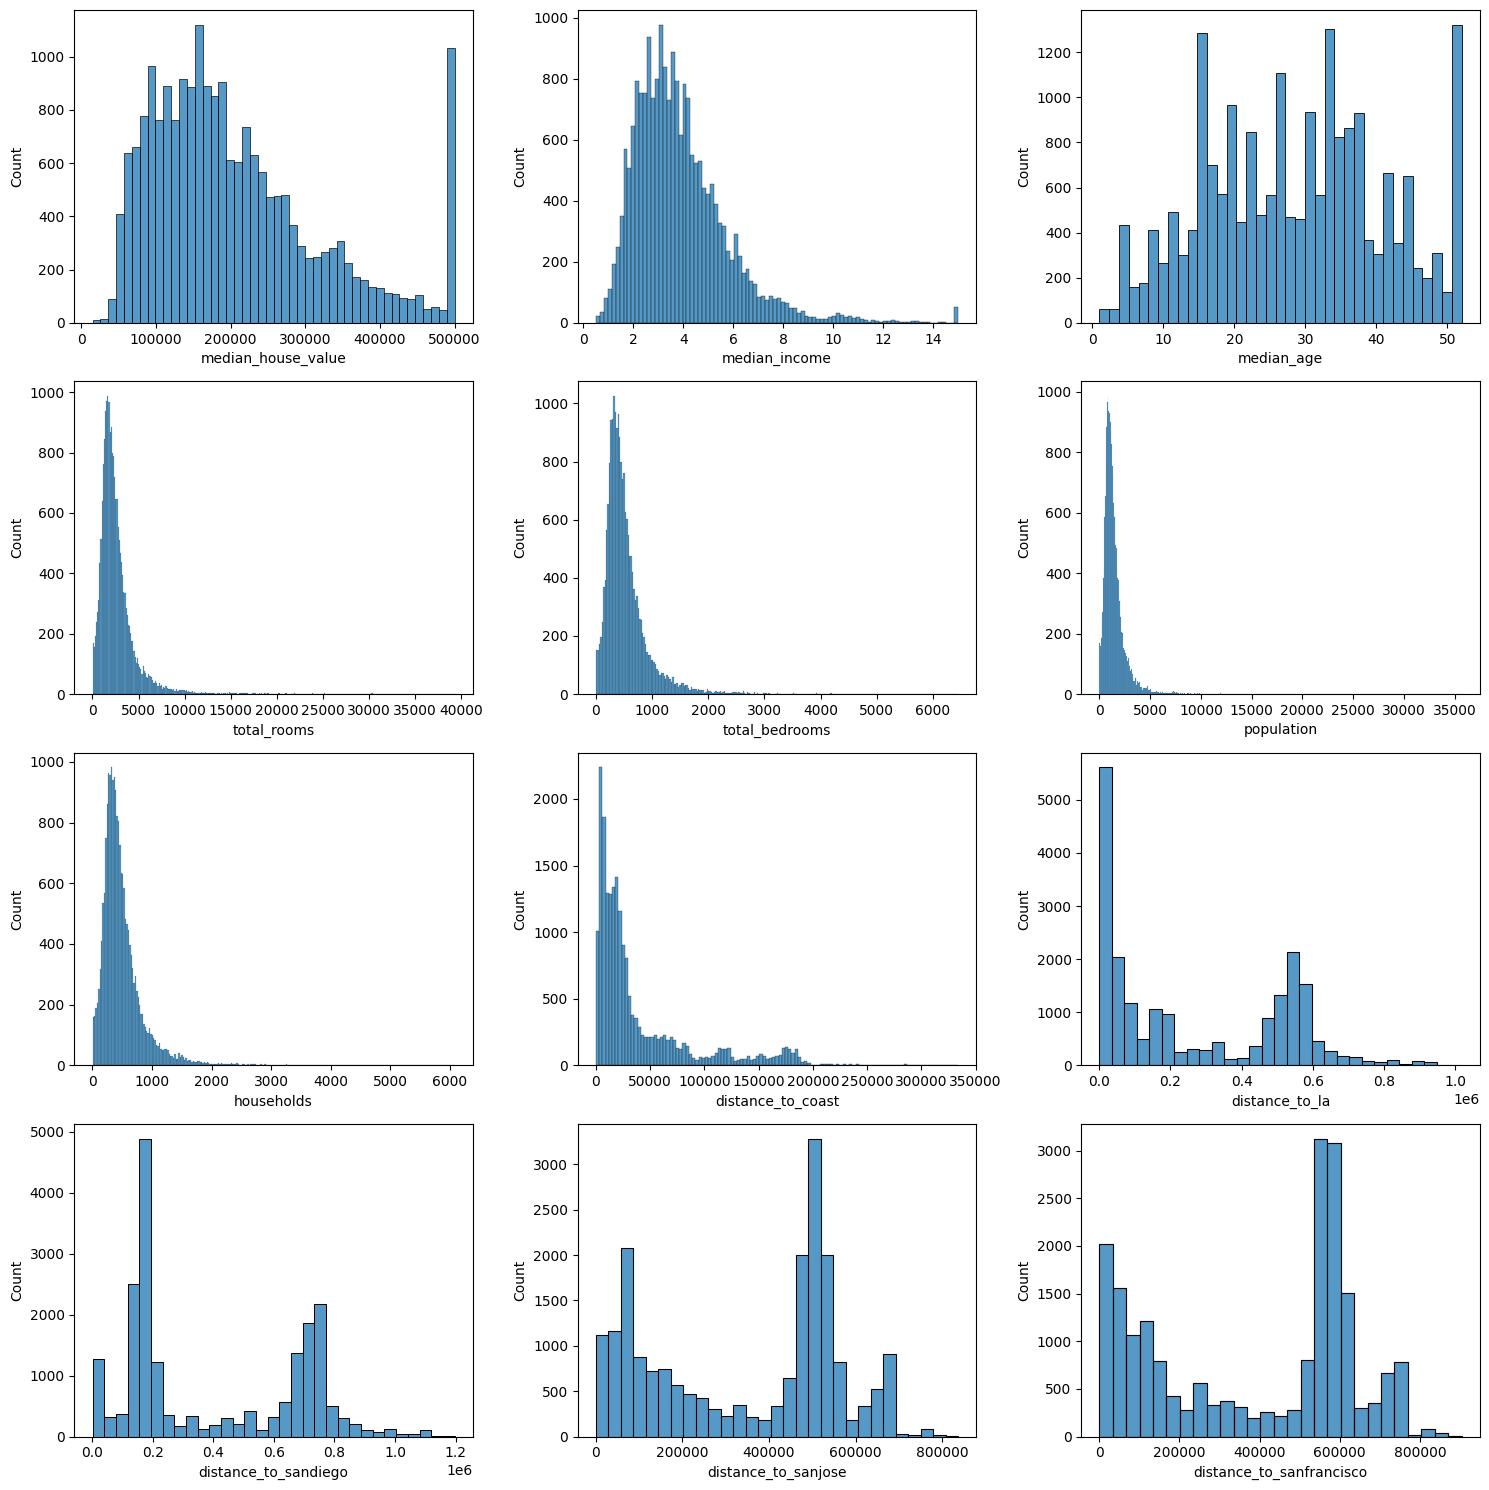

In [11]:
fig, ax = plt.subplots(4, 3, figsize=[15,15])
sns.histplot(data=df, x="median_house_value", ax=ax[0, 0])
sns.histplot(data=df, x="median_income", ax=ax[0, 1])
sns.histplot(data=df, x="median_age", ax=ax[0, 2])
sns.histplot(data=df, x="total_rooms", ax=ax[1, 0])
sns.histplot(data=df, x="total_bedrooms", ax=ax[1, 1])
sns.histplot(data=df, x="population", ax=ax[1, 2])
sns.histplot(data=df, x="households", ax=ax[2, 0])
sns.histplot(data=df, x="distance_to_coast", ax=ax[2, 1])
sns.histplot(data=df, x="distance_to_la", ax=ax[2, 2])
sns.histplot(data=df, x="distance_to_sandiego", ax=ax[3, 0])
sns.histplot(data=df, x="distance_to_sanjose", ax=ax[3, 1])
sns.histplot(data=df, x="distance_to_sanfrancisco", ax=ax[3, 2])
fig.tight_layout()
plt.show()

**Results:** The histograms provide insights into the distribution of each variable.

*   **Median House Value:** The distribution is right-skewed, showing the highest occurencies between 100,000 and 200,000 dollars, and also in the range of 500,000 dollars.
*   **Median Income:**The distribution is also right-skewed, showing most households have a median income within the range of 20,000 to 60,000 dollars.
*   **Median Age:** Displays a wide range of ages of homes, with notable peaks at specific counts. Most of the houses are quite old.
*   **Total Rooms:** The distribution is right-skewed, with the highest counts between 0 and 5000 rooms. The distribution also shows a large total number of rooms in a block.
*   **Total Bedrooms:** The distribution is right-skewed, with the highest counts between 0 and 1000 bedrooms. The distribution also shows a large total number of bedrooms in a block.
*   **Population:** The distribution is right-skewed, showing most blocks have a population less than 5000 people.
*   **Households:** The distribution is right-skewed, showing most households within a block are less than 1000.
*   **Latitude and Longitude:** Both show relatively concentrated distributions, indicating that the properties are located in a geographically limited area.
*   **Distance to Coast:** The distribution is right-skewed, showing a lot of houses are close to the coast.
*   **Distance to Los Angeles:** The distribution  shows a lot of the houses are really close to Los Angeles.
*   **Distance to San Diego:** The distribution  shows a number of the houses are quite close to San Diego.
*   **Distance to San Jose:** The distribution shows more of the houses are far from San Jose.
*   **Distance to San Francisco:** The distribution  shows a number of the houses are far from San Francisco.



Text(0.5, 1.0, 'Median House Value against Median Age')

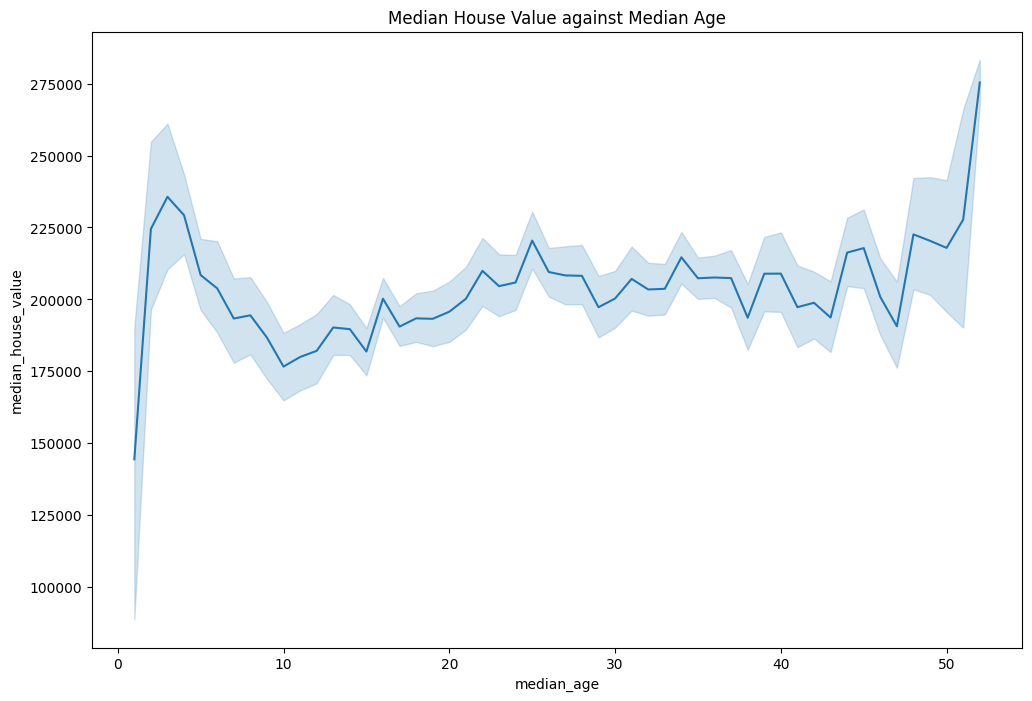

In [12]:
plt.figure(figsize = (12,8))
sns.lineplot(data=df, x='median_age', y='median_house_value')
plt.title('Median House Value against Median Age')

**Take Away:** From the above plot, it can be seen that the newly constructed houses have the greatest house value, and this value decreases as the house gets older. For houses older than 50 years, it seems like their value increases as well.

Text(0.5, 1.0, 'Total Rooms against Median Age')

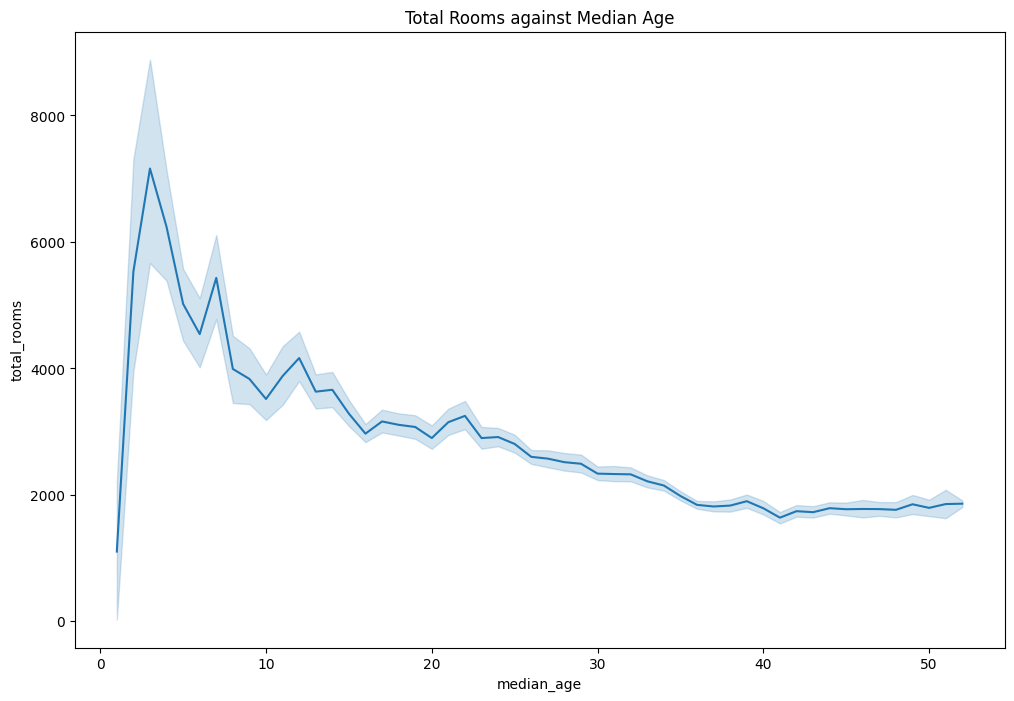

In [13]:
plt.figure(figsize = (12,8))
sns.lineplot(data=df, x='median_age', y='total_rooms')
plt.title('Total Rooms against Median Age')

**Take Away:** From the plot above, it shows that the newer house constructed have more rooms in a block as compared to older houses.

Text(0.5, 1.0, 'Population against Median Age')

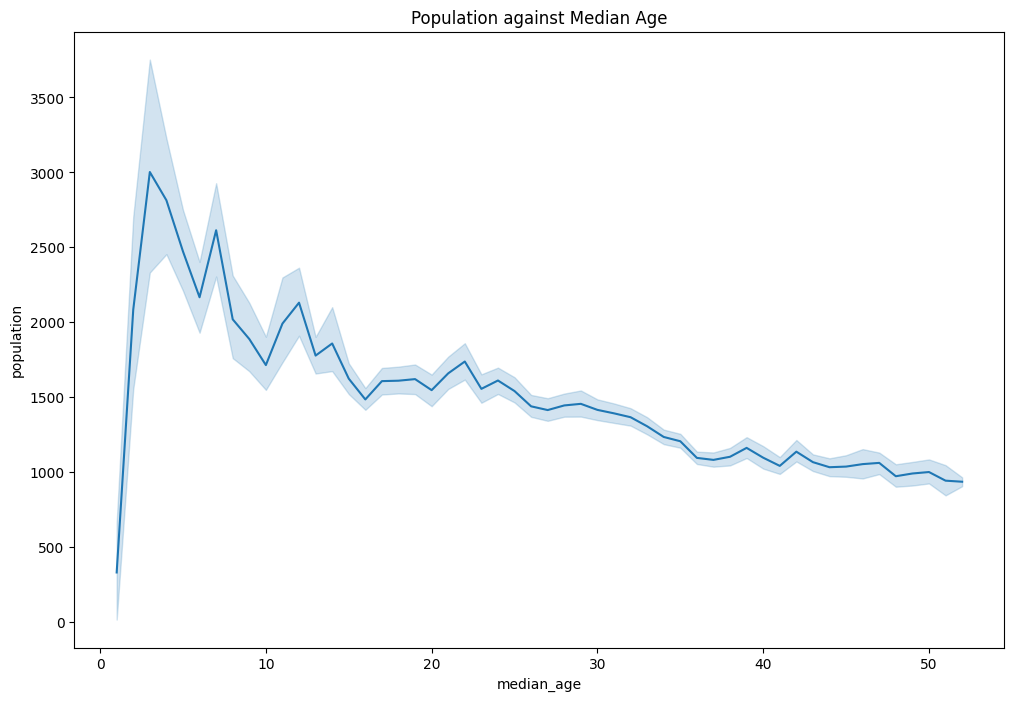

In [14]:
plt.figure(figsize = (12,8))
sns.lineplot(data=df, x='median_age', y='population')
plt.title('Population against Median Age')

**Take Away:** From the plot above, it shows that the population residing in a block is greater in the newer houses constructed, as compared to older houses.

The city of California is shown in the map linked below.

[Map of California](https://drive.google.com/file/d/1ij4ivAdjo-rtfsc2slovAdhV5EAy7Xr_/view?usp=sharing)

Text(0.5, 1.0, 'Showing Dense Areas of California')

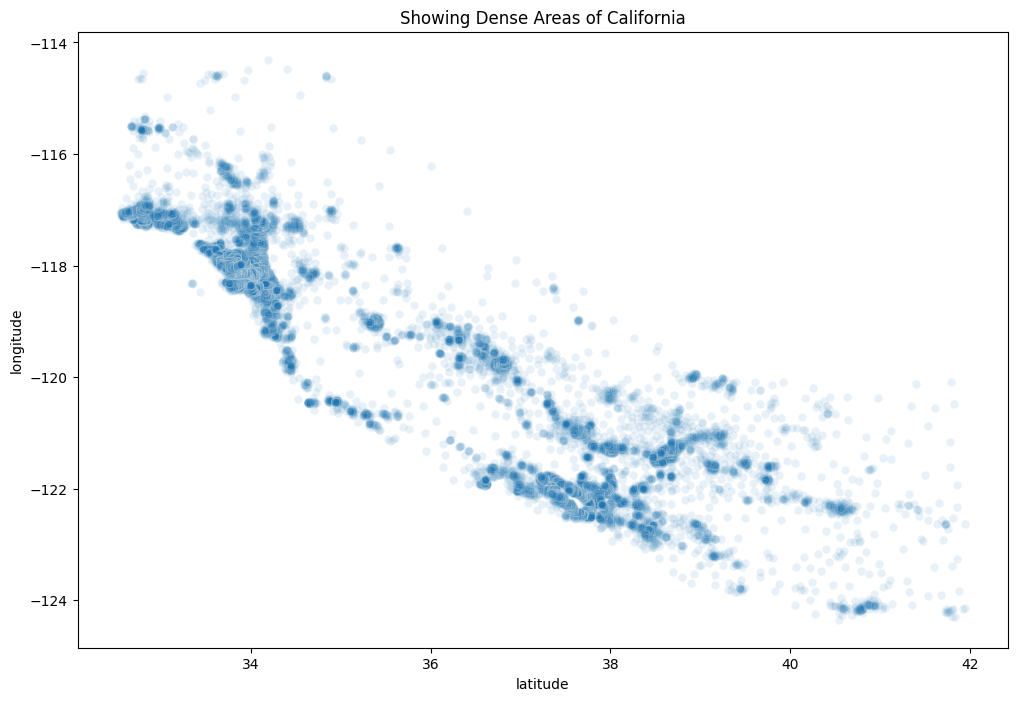

In [15]:
plt.figure(figsize = (12,8))
sns.scatterplot(x ="latitude", y ="longitude", data=df, alpha=0.1)
plt.title('Showing Dense Areas of California')

Text(0.5, 1.0, 'Relationship between Latitude, Longitude, and Distance to Coast')

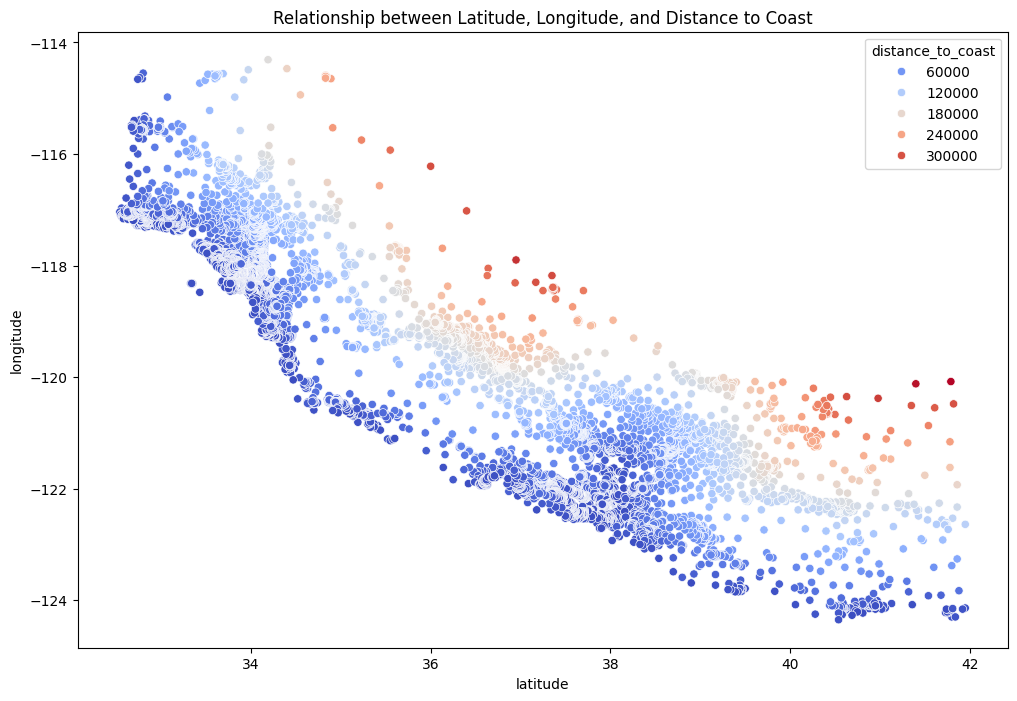

In [16]:
plt.figure(figsize = (12,8))
sns.scatterplot(x ="latitude", y ="longitude", data=df, hue ="distance_to_coast", palette ="coolwarm")
plt.title('Relationship between Latitude, Longitude, and Distance to Coast')

**Take Away:** The visualizations above helps us to see where most of the houses in our data are located. This shows there are a lot of houses, in our dataset, close to the coast.

Text(0.5, 1.0, 'Relationship between Latitude, Longitude, and Median House Value')

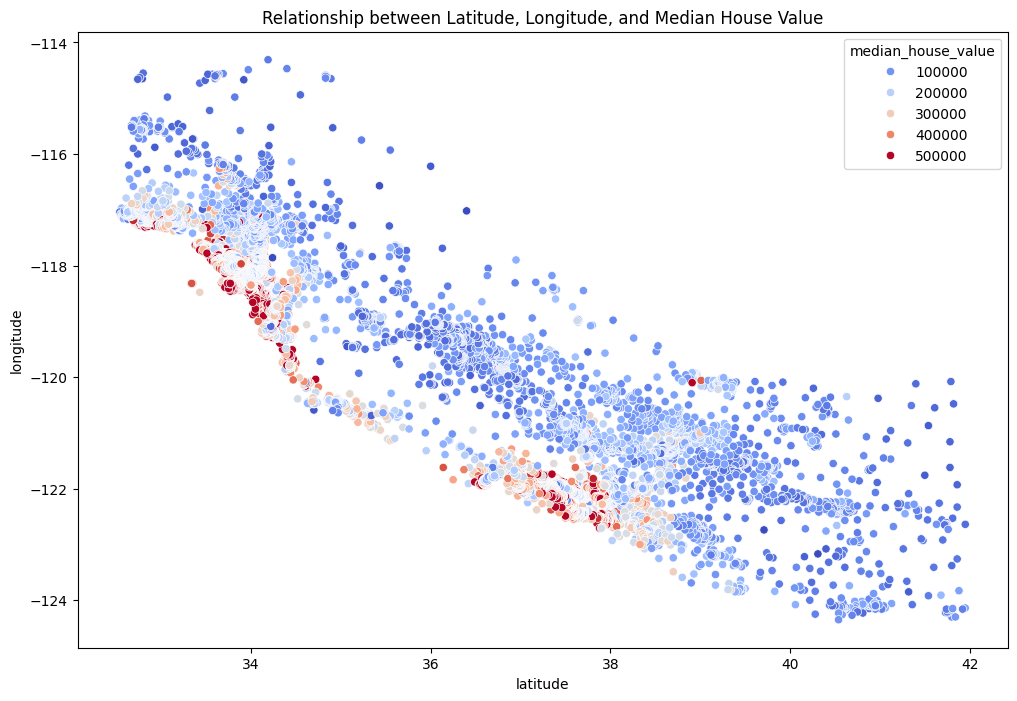

In [17]:
plt.figure(figsize = (12,8))
sns.scatterplot(x="latitude", y="longitude", data=df, hue="median_house_value", palette="coolwarm")
plt.title('Relationship between Latitude, Longitude, and Median House Value')


**Take Away:** From this plot, we can see that most houses along the coast have high median house values. This means that houses closer to the coast are more valuable.

<Axes: >

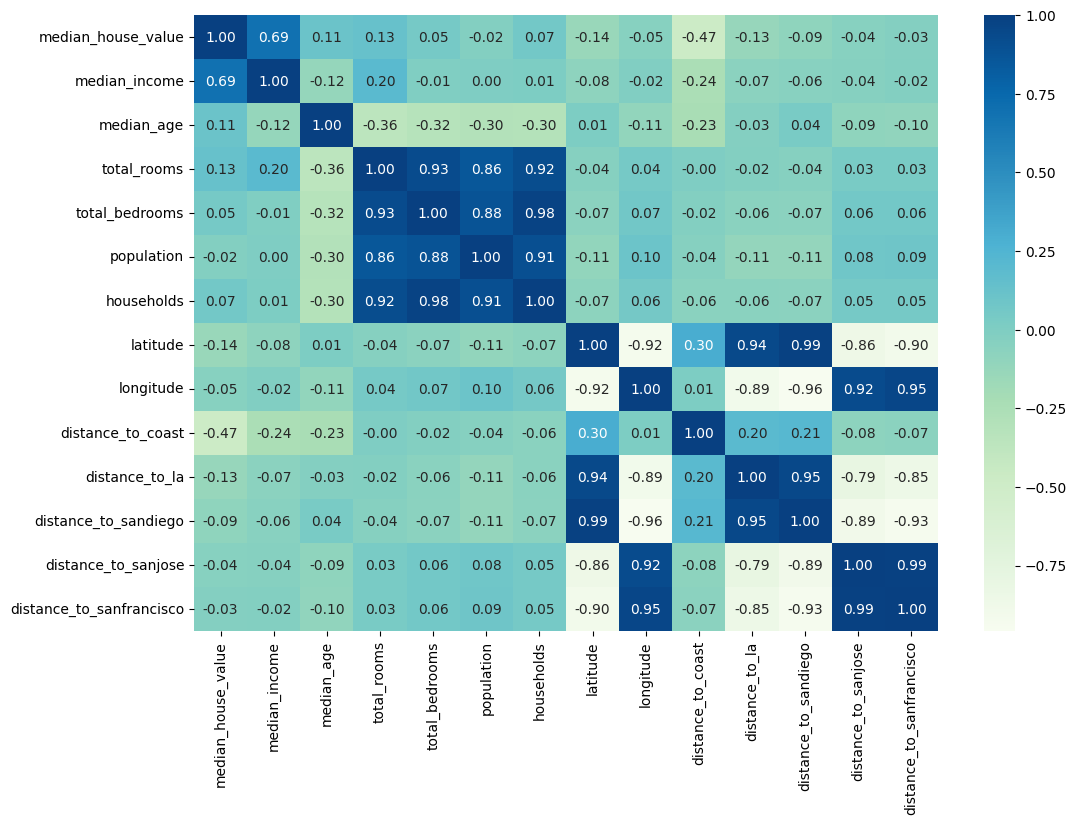

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='GnBu', annot=True, fmt='.2f')

The correlation matrix provides quantified insights into how each variable is related to the others, especially with respect to the median house value.

**Take Away:** Overall, the most significant factor affecting the median house value in this dataset, i.e factor that has a strong positive correlation with median_house_value, appears to be median_income. It indicates that a higher median income means a higher house value. Other factors either have a negative correlation with the house value, or a weak positive correlation.


# Predicting House Prices with a Linear Regression model

First we define our features (x) and target variables (y).

In [19]:
from sklearn.model_selection import train_test_split
# try putting .values at the end and see what you will get
# .values or .to_numpy()
x = df.drop('median_house_value', axis=1)
y = df.median_house_value
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
lr = LinearRegression()
model = lr.fit(x_train, y_train)
model

LinearRegression()

In [21]:
# Check score of train data
model.score(x_train, y_train)

0.6498331491110787

In [22]:
# check score of test data
model.score(x_test, y_test)

0.6329512627916902

From this, we can see that the Linear Regression model performs just a little above average. The model's score using the test data is lower than the score on the training data. We can try dropping strong negative correlated features to the median house value and see if this has any improvement on our model score.

In [23]:
x = df.drop(columns=['distance_to_coast', 'latitude', 'distance_to_la', 'median_house_value'])
y = df.median_house_value
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [24]:
lr = LinearRegression()
model = lr.fit(x_train, y_train)

In [25]:
# Check score of train data
model.score(x_train, y_train)

0.6360428538942116

In [26]:
# check score of test data
model.score(x_test, y_test)

0.6188163827273085

Dropping these features made the model score lower, both on the training and testing data. Next, let's try to use a Polynomial Model to fit our data.

# Predicting House Prices with a Polynomial Linear Regression model

In [27]:
# Use all features to train this model
x = df.drop('median_house_value', axis=1)
y = df.median_house_value

In [28]:
# Transform to a polynomial and split the data for training and testing
poly = PolynomialFeatures(degree=2)
x_trans = poly.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_trans, y, test_size=0.2, random_state=42)

In [29]:
# Fit the training data to the model
model.fit(x_train, y_train)

LinearRegression()

In [30]:
model.score(x_train, y_train)

0.740639395747345

In [31]:
model.score(x_test, y_test)

0.7219633927222326

# Conclusion
Transforming the features to a second degree polynomial causes the model score to increase just a little bit. Note that if the polynomial degree is increased, the model begins to overfit the data. However, in this case, the training score was higher than the test score so there is a tendency to say the model is already overfitting to the data. The model's score can be better improved using various other techniques. Exploring these other techniques will be the next step in this project.